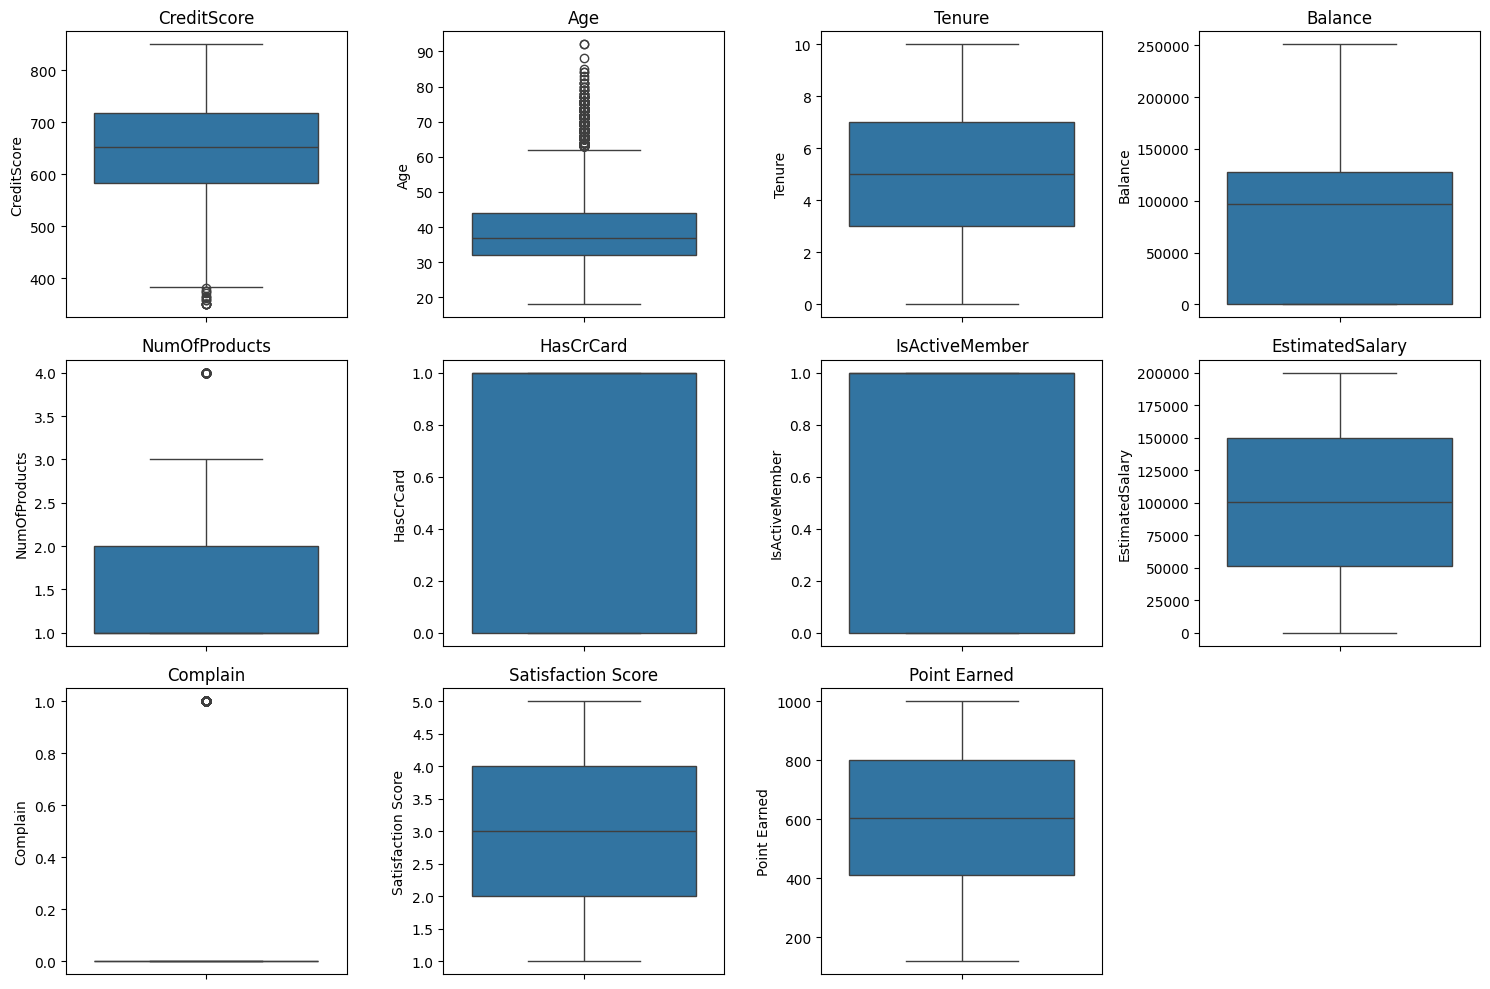

SVM Accuracy (Original Data): 0.9990
RF Accuracy (Original Data): 0.9990
SVM Accuracy (Without Outliers): 1.0000
RF Accuracy (Without Outliers): 1.0000


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove("RowNumber")
numerical_columns.remove("CustomerId")
numerical_columns.remove("Exited")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean
df_clean = remove_outliers(df, numerical_columns)
categorical_columns = ["Geography", "Gender", "Card Type"]
df_encoded = df.copy()
df_clean_encoded = df_clean.copy()
for col in categorical_columns:
    encoder = LabelEncoder()
    df_encoded[col] = encoder.fit_transform(df_encoded[col])
    df_clean_encoded[col] = encoder.transform(df_clean_encoded[col])
X = df_encoded.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
y = df_encoded["Exited"]
X_clean = df_clean_encoded.drop(columns=["RowNumber", "CustomerId", "Surname", "Exited"])
y_clean = df_clean_encoded["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_clean_scaled = scaler.fit_transform(X_train_clean)
X_test_clean_scaled = scaler.transform(X_test_clean)
svm = SVC()
rf = RandomForestClassifier()
svm_clean = SVC()
rf_clean = RandomForestClassifier()
svm.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)
svm_clean.fit(X_train_clean_scaled, y_train_clean)
rf_clean.fit(X_train_clean, y_train_clean)
svm_acc = accuracy_score(y_test, svm.predict(X_test_scaled))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
svm_clean_acc = accuracy_score(y_test_clean, svm_clean.predict(X_test_clean_scaled))
rf_clean_acc = accuracy_score(y_test_clean, rf_clean.predict(X_test_clean))
print(f"SVM Accuracy (Original Data): {svm_acc:.4f}")
print(f"RF Accuracy (Original Data): {rf_acc:.4f}")
print(f"SVM Accuracy (Without Outliers): {svm_clean_acc:.4f}")
print(f"RF Accuracy (Without Outliers): {rf_clean_acc:.4f}")